# 1. 서울 20,30대의 구역별 코로나 확진자 - 바차트

In [ ]:
import os
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# case_data_path = join('../data', 'Case.csv')

In [ ]:
case = pd.read_csv('../data/Case.csv', sep='\t')
df = pd.read_csv('../data/PatientInfo.csv', sep='\t')
policy = pd.read_csv('../data/Policy.csv', sep='\t')
region = pd.read_csv('../data/Region.csv', sep='\t')
searchtrend = pd.read_csv('../data/SearchTrend.csv', sep='\t')
seoulfloating = pd.read_csv('../data/SeoulFloating.csv', sep='\t')
time = pd.read_csv('../data/Time.csv', sep='\t')
# starbucks = pd.read_csv('../data/starbucks.csv', sep='\t')


# 이렇게 해야 컬럼에서 에러가 안남
df= pd.read_csv('../data/PatientInfo.csv', delimiter=',' ,sep=r', ') 
# seoul= pd.read_csv('../data/seoul_covid2021.csv', delimiter=',' ,sep=r', ') 

In [56]:
print(time)

    date,time,test,negative,confirmed,released,deceased
0                              2020-01-20,16,1,0,1,0,0 
1                              2020-01-21,16,1,0,1,0,0 
2                              2020-01-22,16,4,3,1,0,0 
3                            2020-01-23,16,22,21,1,0,0 
4                            2020-01-24,16,27,25,2,0,0 
..                                                 ... 
158       2020-06-26,0,1232315,1200885,12602,11172,282 
159       2020-06-27,0,1243780,1211261,12653,11317,282 
160       2020-06-28,0,1251695,1219975,12715,11364,282 
161       2020-06-29,0,1259954,1228698,12757,11429,282 
162       2020-06-30,0,1273766,1240157,12800,11537,282 

[163 rows x 1 columns]


In [57]:
print(time.head())

  date,time,test,negative,confirmed,released,deceased
0                            2020-01-20,16,1,0,1,0,0 
1                            2020-01-21,16,1,0,1,0,0 
2                            2020-01-22,16,4,3,1,0,0 
3                          2020-01-23,16,22,21,1,0,0 
4                          2020-01-24,16,27,25,2,0,0 


In [58]:
print(df.columns)

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')


In [59]:
df.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB
None


In [90]:
df2=df[['age','province', 'city']]
# df3=df2[df2['age'] == '20s']
# df3=df2[df2['province'] == 'Seoul']

df3=df2[((df2['age'] =='20s' )| (df2['age'] =='30s' ) )& (df['province']=='Seoul')]
df4=df3[['age','city']]

In [91]:
print(df4)

     age          city
1    30s   Jungnang-gu
3    20s       Mapo-gu
4    20s   Seongbuk-gu
6    20s     Jongno-gu
7    20s           etc
..   ...           ...
699  30s  Yangcheon-gu
737  20s  Yangcheon-gu
738  20s  Yangcheon-gu
753  30s  Yangcheon-gu
880  30s    Gangseo-gu

[265 rows x 2 columns]


In [92]:
df5=df4['city'].value_counts()

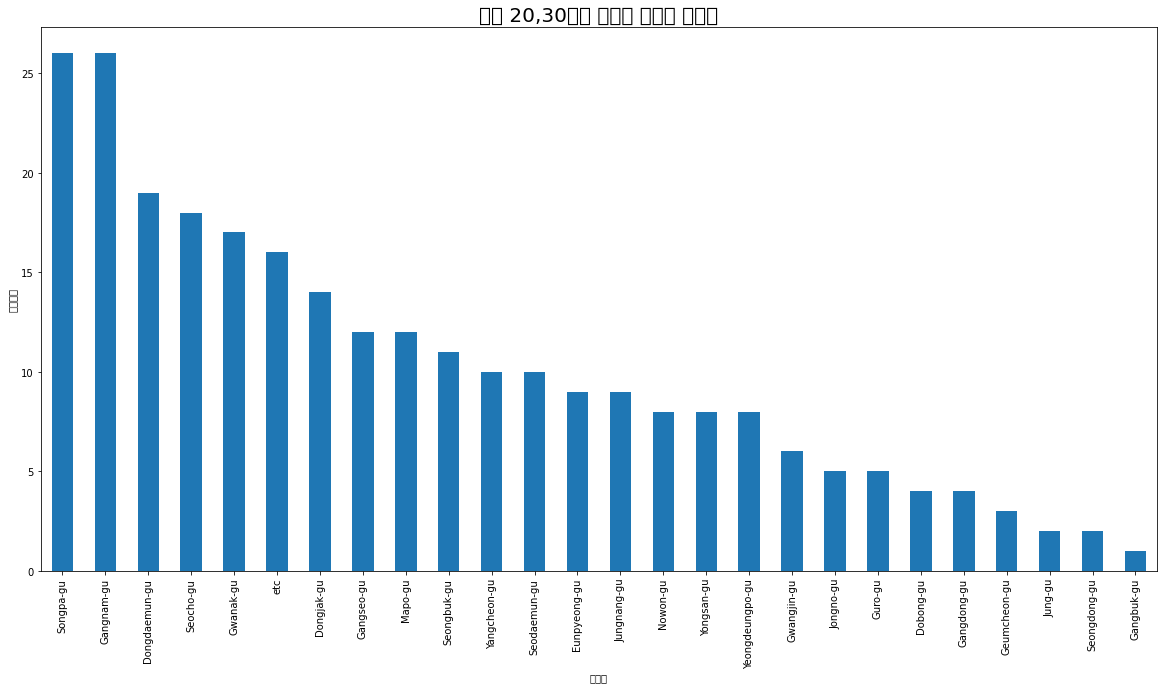

In [95]:
df5.plot(kind='bar')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('서울 20,30대의 구역별 코로나 확진자',fontsize=20) ## 타이틀 출력
plt.xlabel('지역구') ## x축 라벨 출력
plt.ylabel('환진자수') 

plt.show()

# Day2-키워드 관심도

In [6]:
tr= pd.read_csv('../data/SearchTrend.csv', delimiter=',' ,sep=r', ') 

In [7]:
tr.columns

Index(['date', 'cold', 'flu', 'pneumonia', 'coronavirus'], dtype='object')

In [8]:
tr.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [9]:
tr.info

<bound method DataFrame.info of             date     cold      flu  pneumonia  coronavirus
0     2016-01-01  0.11663  0.05590    0.15726      0.00736
1     2016-01-02  0.13372  0.17135    0.20826      0.00890
2     2016-01-03  0.14917  0.22317    0.19326      0.00845
3     2016-01-04  0.17463  0.18626    0.29008      0.01145
4     2016-01-05  0.17226  0.15072    0.24562      0.01381
...          ...      ...      ...        ...          ...
1637  2020-06-25  0.12072  0.04190    0.11936      2.16993
1638  2020-06-26  0.11381  0.03027    0.11317      2.15139
1639  2020-06-27  0.10554  0.02136    0.08354      1.96848
1640  2020-06-28  0.12563  0.02872    0.08072      2.19720
1641  2020-06-29  0.14263  0.04308    0.11254      2.41501

[1642 rows x 5 columns]>

<AxesSubplot:>

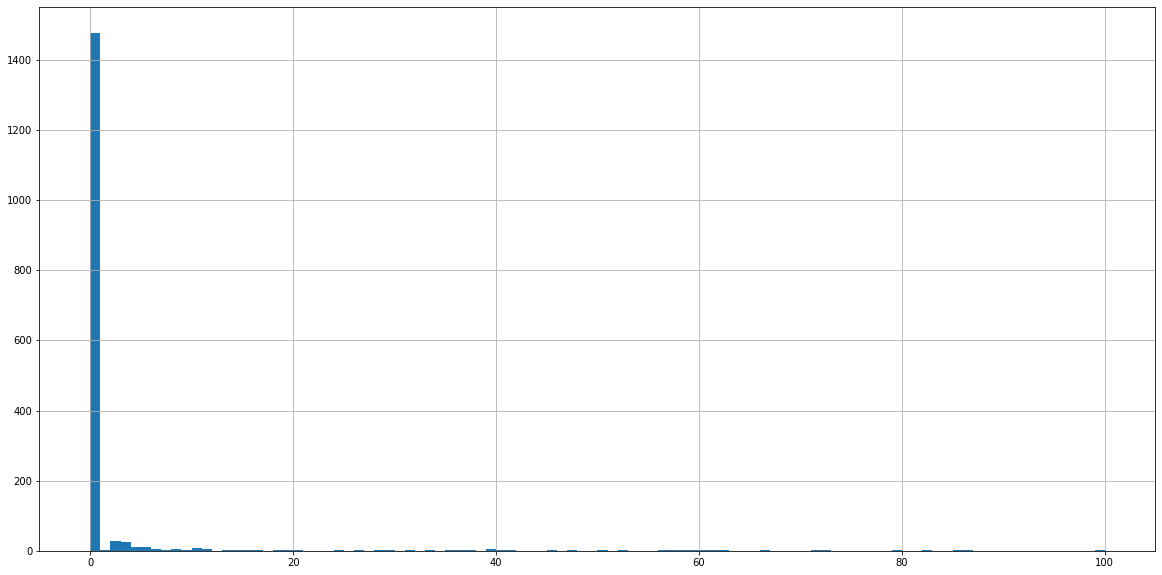

In [10]:
tr['coronavirus'].hist(bins=100)


In [ ]:
tr.plot(kind='bar')
plt.show()

In [ ]:
sns.histplot(x=tr['coronavirus'])

In [15]:
#정렬-코로나바이러스
tr_sort = tr.sort_values(by=['coronavirus'], ascending=False)
tr_sort.head(200)


,date,cold,flu,pneumonia,coronavirus
1483,2020-01-23,0.30308,0.55625,3.18035,100.00000
1484,2020-01-24,0.34689,0.40226,2.48156,86.11541
1513,2020-02-22,1.91594,0.19472,1.27032,85.23907
1514,2020-02-23,1.94203,0.19326,1.15841,82.90014
1516,2020-02-25,1.67058,0.20181,1.02206,79.95441
...,...,...,...,...,...
1063,2018-11-29,0.18199,0.53452,0.25599,0.02799
1068,2018-12-04,0.18590,0.83442,0.29562,0.02799
985,2018-09-12,0.14972,0.12045,0.14326,0.02763
1028,2018-10-25,0.13626,0.18208,0.18353,0.02727


In [16]:
name=input('검색할 질병: 1.cold 2.flu 3.pneumonia :')

tr_sort2 = tr.sort_values(by=[name], ascending=False)
tr_sort2.head(200)

검색할 질병: 1.cold 2.flu 3.pneumonia :cold


,date,cold,flu,pneumonia,coronavirus
1165,2019-03-11,15.72071,0.15381,0.16272,0.00836
1535,2020-03-15,5.02730,0.06754,0.16644,14.92164
1164,2019-03-10,3.33989,0.08545,0.12208,0.00627
729,2017-12-30,2.72528,1.08851,0.17117,0.01345
1011,2018-10-08,2.68582,0.25617,0.17090,0.00772
...,...,...,...,...,...
1557,2020-04-06,0.20717,0.05763,0.14026,10.90885
710,2017-12-11,0.20708,0.48853,0.19572,0.01272
364,2016-12-30,0.20690,1.16187,0.21908,0.01899
844,2018-04-24,0.20672,0.07981,0.20490,0.01036


In [ ]:
tr2=tr_sort.head(200)

In [ ]:

tr_graph=tr2.plot(kind='bar')


검색할 질병: 1.cold 2.flu 3.pneumonia 4.coronavirus :coronavirus


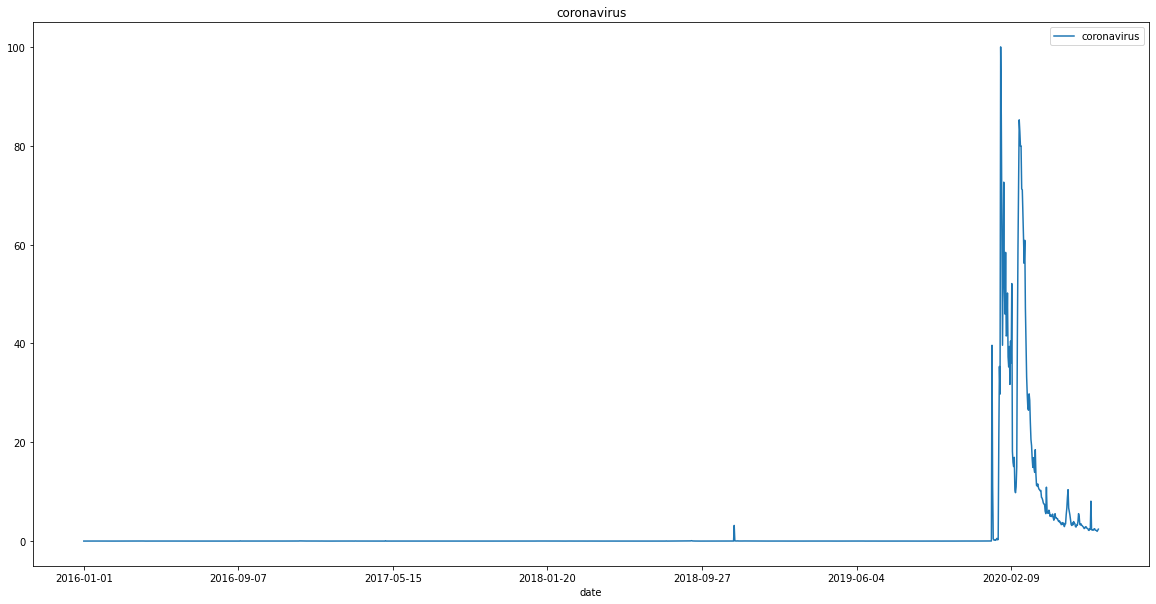

In [35]:
name=input('검색할 질병: 1.cold 2.flu 3.pneumonia 4.coronavirus :')

plt.rcParams['figure.figsize'] = [20, 10] 
graph=tr.plot(x='date', y=name, title=name)


# 서울시 공공데이터 포털-스타벅스 데이터 가공

In [68]:
# starbucks= pd.read_csv('../data/starbucks.csv', delimiter=',' ,sep=r', ') 

In [99]:
#파일 에러
file = '../data/starbucks.csv'        
oscar_demographics = pd.read_csv(file)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 0: invalid start byte

In [100]:
#
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

스타벅스 데이터 불러오기

In [81]:
starbucks = pd.read_csv(file,encoding='EUC-KR')
starbucks.head(100)

,지점명,주소,위도,경도
0,구로호텔,"서울특별시 구로구 디지털로32길 72, 구로호텔 1층 (구로동)",37.483129,126.898859
1,구로디지털타워,서울특별시 구로구 디지털로32길 30 (구로동),37.483432,126.896480
2,구로디지털로,"서울특별시 구로구 디지털로33길 11, 에이스테크노8차 1층 (구로동)",37.485911,126.895587
3,구로에이스,"서울특별시 구로구 디지털로 285, 에이스트윈타워1차 103호 (구로동)",37.484483,126.894496
4,구로하이엔드,"서울특별시 구로구 디지털로26길 5, 에이스하이엔드타워1차 103호 (구로동)",37.481618,126.893136
...,...,...,...,...
95,발산역사거리,서울특별시 강서구 공항대로 248 (마곡동),37.558509,126.835096
96,마곡역,서울특별시 강서구 공항대로 168 (마곡동),37.559611,126.826298
97,우장산역,서울특별시 강서구 강서로 267 (내발산동),37.549501,126.835984
98,마곡사이언스타워R,서울특별시 강서구 마곡동로 62 (마곡동),37.560526,126.833887


In [83]:
starbucks=starbucks.rename({'주소':'address'},axis=1)
starbucks=starbucks.rename({'위도':'latitude'},axis=1)
starbucks=starbucks.rename({'경도':'longitude'},axis=1)

In [84]:
starbucks.head()

,지점명,address,latitude,longitude
0,구로호텔,"서울특별시 구로구 디지털로32길 72, 구로호텔 1층 (구로동)",37.483129,126.898859
1,구로디지털타워,서울특별시 구로구 디지털로32길 30 (구로동),37.483432,126.896480
2,구로디지털로,"서울특별시 구로구 디지털로33길 11, 에이스테크노8차 1층 (구로동)",37.485911,126.895587
3,구로에이스,"서울특별시 구로구 디지털로 285, 에이스트윈타워1차 103호 (구로동)",37.484483,126.894496
4,구로하이엔드,"서울특별시 구로구 디지털로26길 5, 에이스하이엔드타워1차 103호 (구로동)",37.481618,126.893136


In [112]:
province=input('구 이름 입력:')
# 강서구 강동구 강남구 성북구 중구 은평구 금천구 광진구 서대문구 중랑구 강북구 관악구 구로구 영등포구 마포구 종로구 도봉구
starbucks[starbucks['address'].str.contains(province)]

구 이름 입력:강서구


,지점명,address,latitude,longitude
95,발산역사거리,서울특별시 강서구 공항대로 248 (마곡동),37.558509,126.835096
96,마곡역,서울특별시 강서구 공항대로 168 (마곡동),37.559611,126.826298
97,우장산역,서울특별시 강서구 강서로 267 (내발산동),37.549501,126.835984
98,마곡사이언스타워R,서울특별시 강서구 마곡동로 62 (마곡동),37.560526,126.833887
99,방화DT,서울특별시 강서구 방화대로 375 (방화동),37.574339,126.816415
100,마곡나루역,서울특별시 강서구 마곡중앙로 161-17 (마곡동),37.568130,126.826140
101,마곡GMG,"서울특별시 강서구 마곡중앙6로 16 (마곡동) 117,118,119,120호",37.560487,126.829667
102,가양역,서울특별시 강서구 양천로 476 (등촌동),37.561640,126.853327
103,화곡DT,서울특별시 강서구 등촌로 57 (화곡동),37.535149,126.863232
104,양천향교역,서울특별시 강서구 강서로 463 (마곡동),37.566964,126.840731


In [128]:
st_1=starbucks[starbucks['address'].str.contains(province)]
st_1.shape[0]
# st_1.count()

80

In [119]:
list_province =['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구','노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구','서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']

In [ ]:
list_province_eng =['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구','노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구','서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']

In [120]:
list_num=[i for i in range(len(list_province))]

In [140]:
st_list=[0]*25

In [141]:
st_list

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [143]:

for i in range(25):
    province=list_province[i]
    st_1=starbucks[starbucks['address'].str.contains(province)]
    num=st_1.shape[0]
    st_list[i]=num

In [136]:
list_province[0]

'강남구'

In [144]:
st_list

[80,
 14,
 20,
 5,
 11,
 15,
 10,
 10,
 13,
 8,
 2,
 11,
 32,
 18,
 11,
 13,
 46,
 30,
 34,
 19,
 15,
 8,
 38,
 86,
 6]

구별로 스타벅스 개수 딕셔너리로 만들기

In [145]:
star_dict=dict(zip(list_province,st_list))

In [146]:
star_dict

{'강남구': 80,
 '강동구': 14,
 '강서구': 20,
 '강북구': 5,
 '관악구': 11,
 '광진구': 15,
 '구로구': 10,
 '금천구': 10,
 '노원구': 13,
 '동대문구': 8,
 '도봉구': 2,
 '동작구': 11,
 '마포구': 32,
 '서대문구': 18,
 '성동구': 11,
 '성북구': 13,
 '서초구': 46,
 '송파구': 30,
 '영등포구': 34,
 '용산구': 19,
 '양천구': 15,
 '은평구': 8,
 '종로구': 38,
 '중구': 86,
 '중랑구': 6}

In [151]:
print(pd.DataFrame.from_dict({
    '강남구': 80,
 '강동구': 14,
 '강서구': 20,
 '강북구': 5,
 '관악구': 11,
 '광진구': 15,
 '구로구': 10,
 '금천구': 10,
 '노원구': 13,
 '동대문구': 8,
 '도봉구': 2,
 '동작구': 11,
 '마포구': 32,
 '서대문구': 18,
 '성동구': 11,
 '성북구': 13,
 '서초구': 46,
 '송파구': 30,
 '영등포구': 34,
 '용산구': 19,
 '양천구': 15,
 '은평구': 8,
 '종로구': 38,
 '중구': 86,
 '중랑구': 6}, orient='index').rename(columns={0:'starbucks_num'}))

      starbucks_num
강남구              80
강동구              14
강서구              20
강북구               5
관악구              11
광진구              15
구로구              10
금천구              10
노원구              13
동대문구              8
도봉구               2
동작구              11
마포구              32
서대문구             18
성동구              11
성북구              13
서초구              46
송파구              30
영등포구             34
용산구              19
양천구              15
은평구               8
종로구              38
중구               86
중랑구               6


# # day3-나이대별 인구대비 확진자수

In [36]:
tg= pd.read_csv('../data/TimeAge.csv', delimiter=',' ,sep=r', ')

In [37]:
tg.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [39]:
tg.groupby(['age']).sum()

,time,confirmed,deceased
age,,,
0s,0,16107,0
10s,0,68752,0
20s,0,345827,0
30s,0,137539,194
40s,0,168250,295
50s,0,230030,1537
60s,0,158505,3743
70s,0,82107,7599
80s,0,54086,12136


In [40]:
tg2=tg.groupby(['age']).sum()

In [41]:
age_pop=[3809849,4727626,6708734,6745531,8182067,8610979,7097818,3705737,1808689]
#연령별 인구

In [46]:
tg2.confirmed

age
0s      16107
10s     68752
20s    345827
30s    137539
40s    168250
50s    230030
60s    158505
70s     82107
80s     54086
Name: confirmed, dtype: int64

In [49]:
tg2_list=[]
for i in (tg2.confirmed):
    tg2_list.append(i)

In [50]:
tg2_list

[16107, 68752, 345827, 137539, 168250, 230030, 158505, 82107, 54086]

In [57]:
age_p=[0]*9
for i in range(len(tg2_list)):
    age_p[i]=tg2_list[i]*(1/age_pop[i])*100

In [64]:
age_p
sum_age=0
for i in range(len(age_p)):
    sum_age+=age_p[i]
sum_age

21.237725086537026

In [72]:
age_ratio=[0]*9
for i in range(len(age_p)):
    age_ratio[i]=age_p[i]/sum_age*(100)

In [73]:
age_ratio

[1.9906683006115506,
 6.84753450208913,
 24.272266395374096,
 9.60067404683208,
 9.682422883528178,
 12.578358095962727,
 10.515020231369586,
 10.432721060571875,
 14.080334483660776]

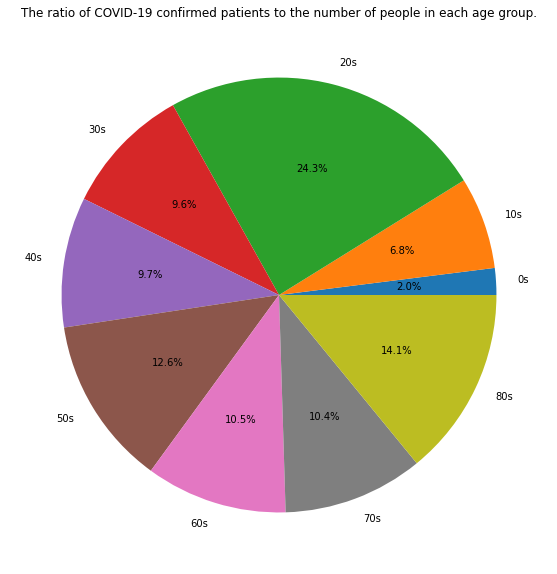

In [79]:
ratio = age_ratio
labels = ['0s', '10s', '20s', '30s','40s','50s','60s','70s','80s']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('The ratio of COVID-19 confirmed patients to the number of people in each age group.')
plt.show()